# Keras MNIST tutorial

https://elitedatascience.com/keras-tutorial-deep-learning-in-python

In [50]:
import numpy as np
np.random.seed(123)  # for reproducibility

In [51]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist
import keras.callbacks

In [52]:
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [53]:
print X_train.shape

(60000, 28, 28)


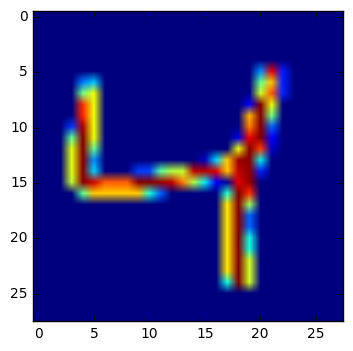

In [54]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[2])

### Change images data array shape for Theano backend

Need to define images depth as 2-nd shape dimension.

In [55]:
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)

In [56]:
print X_train.shape
print X_test.shape

(60000, 1, 28, 28)
(10000, 1, 28, 28)


In [57]:
# Convert to float32 and normalise to range [0,1]
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [58]:
print y_train.shape
print y_train[:10]

(60000,)
[5 0 4 1 9 2 1 3 1 4]


## Convert labels to 10 distinct class labels (one-hot)

In [59]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [60]:
print Y_train.shape
# (60000, 10)

(60000, 10)


# Step 7. Define model architecture

In [61]:
model = Sequential()

*dim_ordering="th" needed:*  
*https://github.com/fchollet/keras/issues/3945*,  
*ref: https://keras.io/layers/convolutional/#convolution2d*

dim_ordering: 'th' or 'tf'. In 'th' mode, the channels dimension (the depth) is at index 1, in 'tf' mode is it at index 3. It defaults to the image_dim_ordering value found in your Keras config file at ~/.keras/keras.json. If you never set it, then it will be "tf".

In [62]:
model.add(Convolution2D(32, 3, 3, activation='relu',
                        dim_ordering="th", input_shape=(1,28,28)))

In [63]:
print model.output_shape

(None, 32, 26, 26)


In [64]:
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [65]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [77]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_5 (Convolution2D)  (None, 32, 26, 26)    320         convolution2d_input_3[0][0]      
____________________________________________________________________________________________________
convolution2d_6 (Convolution2D)  (None, 30, 24, 32)    7520        convolution2d_5[0][0]            
____________________________________________________________________________________________________
maxpooling2d_3 (MaxPooling2D)    (None, 15, 12, 32)    0           convolution2d_6[0][0]            
____________________________________________________________________________________________________
dropout_5 (Dropout)              (None, 15, 12, 32)    0           maxpooling2d_3[0][0]             
___________________________________________________________________________________________

In [67]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

## Prepare callback for Tensorboard

In [88]:
tb_cb = keras.callbacks.TensorBoard(log_dir="/root/keras/logs/03", histogram_freq=1, write_graph=True, write_images=True)
cbks = [tb_cb]

# Step 9. Fit model on training data

In [89]:
samples = 1000
history = model.fit(X_train[:samples], Y_train[:samples], 
          batch_size=32, nb_epoch=12, verbose=1, callbacks=cbks)

Epoch 1/12
1000/1000 [==============================] - 4s - loss: 0.0197 - acc: 0.9940     
Epoch 2/12
1000/1000 [==============================] - 4s - loss: 0.0086 - acc: 0.9980     
Epoch 3/12
1000/1000 [==============================] - 4s - loss: 0.0107 - acc: 0.9970     
Epoch 4/12
1000/1000 [==============================] - 4s - loss: 0.0061 - acc: 0.9980     
Epoch 5/12
1000/1000 [==============================] - 4s - loss: 0.0059 - acc: 0.9990     
Epoch 6/12
1000/1000 [==============================] - 4s - loss: 0.0053 - acc: 1.0000     
Epoch 7/12
1000/1000 [==============================] - 4s - loss: 0.0060 - acc: 0.9980     
Epoch 8/12
1000/1000 [==============================] - 4s - loss: 0.0078 - acc: 0.9980     
Epoch 9/12
1000/1000 [==============================] - 4s - loss: 0.0030 - acc: 0.9990     
Epoch 10/12
1000/1000 [==============================] - 4s - loss: 0.0065 - acc: 0.9980     
Epoch 11/12
1000/1000 [==============================] - 4s - loss: 0

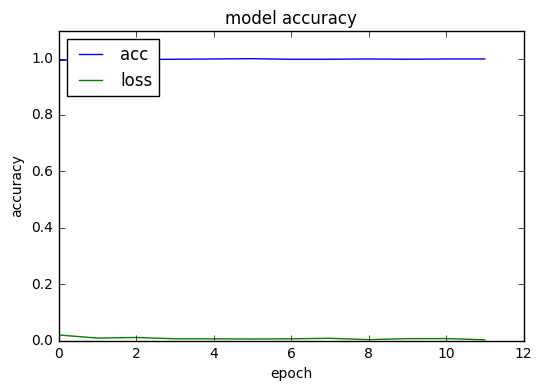

In [91]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['loss'])
axes = plt.gca()
axes.set_ylim([0,1.1])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['acc', 'loss'], loc='upper left')
plt.show()

# Step 10. Evaluate model on test data

In [73]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [74]:
print score

[0.031892647158790671, 0.99139999999999995]
